# Hypothesis Testing in Healthcare: Drug Safety
## Hypothesis Testing in Healthcare and Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda)

In [9]:
# Import packages
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

Text(0.5, 1.0, 'Distribution of the Number of Effects Between the Groups')

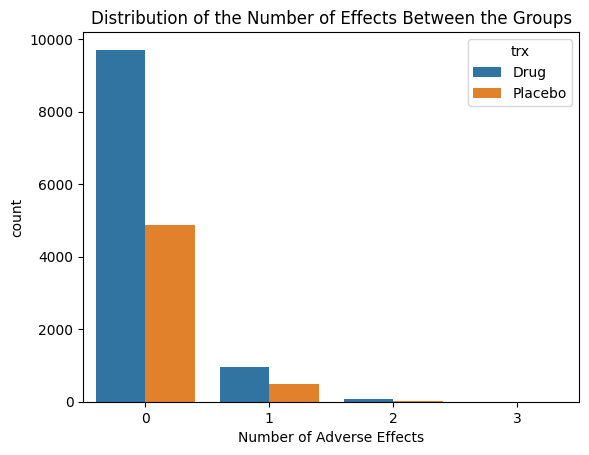

In [10]:
# The distribution of adverse effects
plot_num_eff = sns.countplot(x='num_effects', hue='trx', data=drug_safety)

# Set the x axis label and title
plt.xlabel("Number of Adverse Effects")
plt.title("Distribution of the Number of Effects Between the Groups")

In [11]:
# Two samples proportions z test
drug_safety.groupby('trx')['adverse_effects'].value_counts()
n_yes = np.array([1024, 512])
n_rows = np.array([9703+1024, 4864+512])
two_samp_z_stat, two_samp_z_p_value = proportions_ztest(n_yes, n_rows, alternative='two-sided')

# Round to three decimal places
two_samp_z_stat = np.round(two_samp_z_stat, 3)
two_samp_z_p_value = np.round(two_samp_z_p_value, 3)

if two_samp_z_p_value > 0.05:
    print(f'P-value is {two_samp_z_p_value:.3f}. Probably the same proportion')
else:
    print(f'P-value is {two_samp_z_p_value:.3f}. Probably different proportion')

P-value is 0.964. Probably the same proportion


In [12]:
# Association between adverse effects and the groups
expected, observed, stats = pingouin.chi2_independence(x='num_effects', y='trx', data=drug_safety)

# Round the test statistics to three decimal places
stats = stats.round(3)

pearson_num_effect_trx = stats[stats['test'] == 'pearson']
pearson_num_effect_trx

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,1.8,3.0,0.615,0.011,0.176


## Results

<AxesSubplot: xlabel='age', ylabel='Count'>

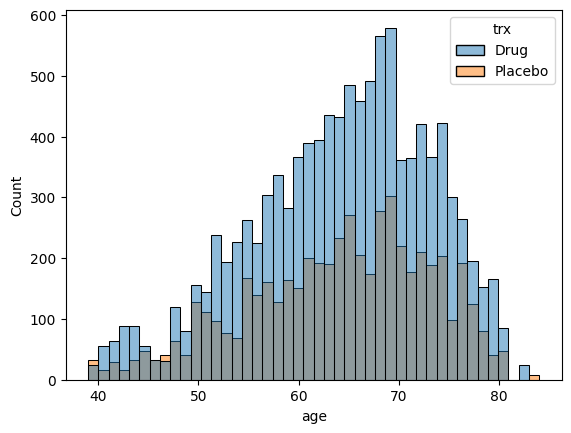

In [13]:
sns.histplot(x='age', hue='trx', data=drug_safety)

In [14]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro
age_data = drug_safety.age
stat, p = shapiro(age_data)
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.98, p=0.00
Probably not Gaussian


In [15]:
# Significant difference between the ages of both groups
drug_group = drug_safety[drug_safety['trx'] == 'Drug']['age']
placebo_group = drug_safety[drug_safety['trx'] == 'Placebo']['age']
two_ind_samp_results = pingouin.mwu(drug_group, placebo_group).round(3)
print(two_ind_samp_results)
if two_ind_samp_results['p-val'][0] > 0.05:
    print(f'Probably the same proportion')
else:
    print(f'Probably different proportion')

          U-val alternative  p-val    RBC   CLES
MWU  29149339.5   two-sided  0.257 -0.011  0.505
Probably the same proportion
